In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import  yfinance as yf


In [ ]:
# ambil data
df = yf.download('BTC-USD', start='2024-01-01', end='2024-12-31')
# tampil data
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-01-01,44167.332031,44175.437500,42214.976562,42280.234375,18426978443
2024-01-02,44957.968750,45899.707031,44176.949219,44187.140625,39335274536
2024-01-03,42848.175781,45503.242188,40813.535156,44961.601562,46342323118
2024-01-04,44179.921875,44770.023438,42675.175781,42855.816406,30448091210
2024-01-05,44162.691406,44353.285156,42784.718750,44192.980469,32336029347
...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565


In [ ]:
df.shape

(365, 5)

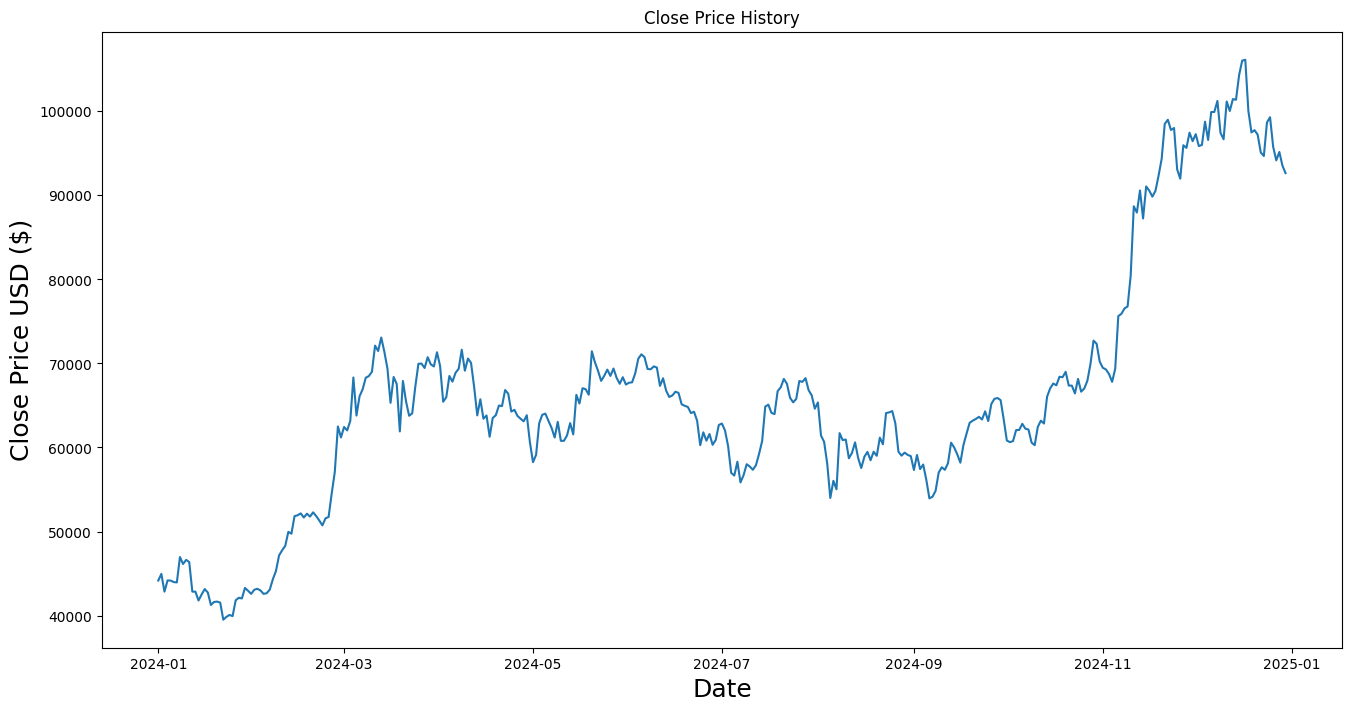

In [ ]:
#visualise data close
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# filter data hanya close saja
data = df['Close']
# konversi ke array numpy
datasets = data.values
# ambil panjang data training
train_data_len = math.ceil(len(datasets)*0.8)
train_data_len

292

In [ ]:
# scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datasets)
scaled_data

array([[0.06993454],
       [0.08180004],
       [0.05013727],
       [0.07012349],
       [0.0698649 ],
       [0.06726115],
       [0.06656934],
       [0.11200322],
       [0.09953536],
       [0.10685974],
       [0.10296992],
       [0.05021219],
       [0.05005033],
       [0.03435076],
       [0.04509164],
       [0.05474112],
       [0.04855363],
       [0.02633358],
       [0.03168147],
       [0.03238952],
       [0.03059161],
       [0.        ],
       [0.0050753 ],
       [0.00854989],
       [0.00639983],
       [0.03465994],
       [0.03920998],
       [0.03794243],
       [0.05674164],
       [0.05170456],
       [0.04615172],
       [0.05355295],
       [0.05520507],
       [0.05229947],
       [0.04616637],
       [0.04729323],
       [0.05368649],
       [0.07219904],
       [0.0869566 ],
       [0.11465498],
       [0.12402085],
       [0.13186439],
       [0.15684149],
       [0.15360314],
       [0.18488264],
       [0.18656137],
       [0.18988776],
       [0.182

In [ ]:
# melakukan training data scaled
train_data = scaled_data[0:train_data_len, :]
# membuat data training
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.06993454, 0.08180004, 0.05013727, 0.07012349, 0.0698649 ,
       0.06726115, 0.06656934, 0.11200322, 0.09953536, 0.10685974,
       0.10296992, 0.05021219, 0.05005033, 0.03435076, 0.04509164,
       0.05474112, 0.04855363, 0.02633358, 0.03168147, 0.03238952,
       0.03059161, 0.        , 0.0050753 , 0.00854989, 0.00639983,
       0.03465994, 0.03920998, 0.03794243, 0.05674164, 0.05170456,
       0.04615172, 0.05355295, 0.05520507, 0.05229947, 0.04616637,
       0.04729323, 0.05368649, 0.07219904, 0.0869566 , 0.11465498,
       0.12402085, 0.13186439, 0.15684149, 0.15360314, 0.18488264,
       0.18656137, 0.18988776, 0.18242592, 0.18932264, 0.18416902,
       0.19175878, 0.18507   , 0.17705287, 0.16845321, 0.18104681,
       0.18348008, 0.22533853, 0.26380235, 0.34513441, 0.32552848])]
[0.3441715810452133]



In [ ]:
# konversi data x_train dan y_train ke arrays numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# mereshape data untuk lstm

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(232, 60, 1)

In [ ]:
# bangun lstm model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# mengkompile data
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# melatih data hasil kompile
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0016
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0016
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0017
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0016
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0016
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0015
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0016
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0017
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0017
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0015
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0016
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0016
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0020
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0019
Epoch 16/100
8/8 ━━

In [ ]:
# membuat testing data
test_data = scaled_data[train_data_len-60: , :]
# membuat dataset x dan y
x_test = []
y_test = datasets[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# konversi data ke arrays numpy
x_test = np.array(x_test)

In [ ]:
# mereshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# ambil prediksi data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# ambil RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3396.4989297945203

<ipython-input-27-445150b1b2ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


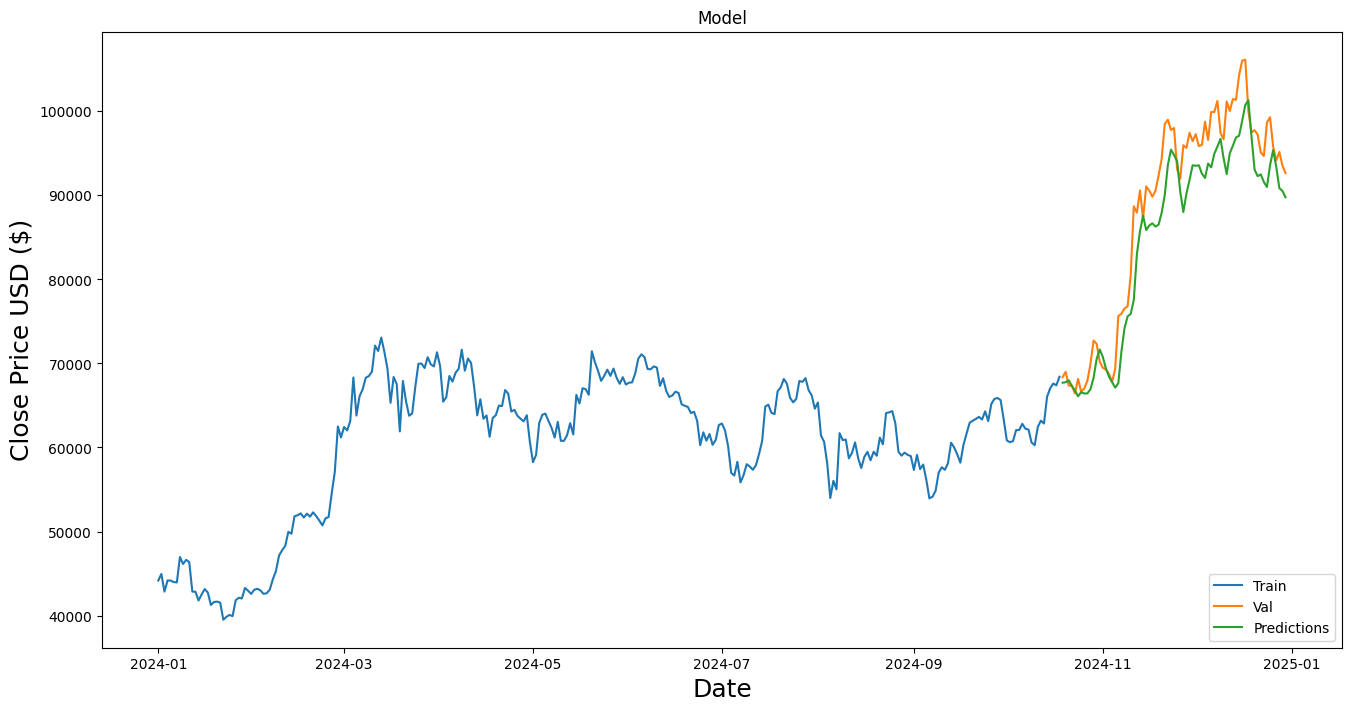

In [ ]:
# plot data
train = data[:train_data_len]
valid = data[train_data_len : train_data_len + len(predictions)]
valid['Predictions'] = predictions
close_column = 'BTC-USD'

#visualisasi data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Use the identified close_column for plotting
plt.plot(train[close_column])
plt.plot(valid[[close_column, 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

Ticker,BTC-USD,Predictions
Date,,
2024-10-19,68362.734375,67200.289062
2024-10-20,69001.703125,67745.882812
2024-10-21,67367.851562,68182.937500
2024-10-22,67361.406250,68160.328125
2024-10-23,66432.195312,67923.570312
...,...,...
2024-12-26,95795.515625,88491.210938
2024-12-27,94164.859375,88538.710938
2024-12-28,95163.929688,88052.968750


In [ ]:
# ambil btc
df = yf.download('BTC-USD', start='2024-01-01', end='2024-12-31')

# ambil kolom close
data = df['Close']

# ambil data 60 hari terakhir dan konvert ke numpy arrays
last_60_days = data[-60:].values

# Fit data dan reshape
scaler.fit(data.values.reshape(-1, 1))

# scale data
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# bikin list kosong
X_test = []

# append data ke list
X_test.append(last_60_days_scaled)

# konversi ke numpy arrays
X_test = np.array(X_test)

# reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# ambil prediksi
pred_price = model.predict(X_test)

# undo scalling data
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[86464.445]]


In [ ]:
# harga asli
df = yf.download('BTC-USD', start='2024-01-01', end='2024-12-31')
df.head(1)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-01-01,44167.332031,44175.4375,42214.976562,42280.234375,18426978443
